In [205]:
#Imports
import pylab as pb
import numpy as np
import math
from math import pi
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import matplotlib.mlab as mlab

from numpy.linalg import inv

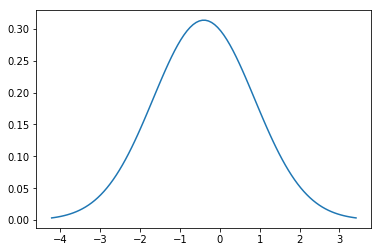

In [206]:
#Prior distribution over W

W = [-1.3,0.5]

mu = -0.4
variance = 1.62

sigma = math.sqrt(variance)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

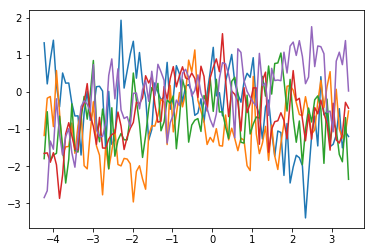

In [208]:
#sample from multivariate, 

#f =np.random.multivariate_normal(mu,k)

#compute distance matrix, 

#compute exponential oif all elements in matrix
#E = np.exp(d)

n = np.linspace(-5,5, 200)
x1 = x.reshape(-1,1)

mu1 = np.zeros(x.shape)


#compute covariance matrix
K1 = np.exp(-cdist(x1,x1)**(2/5))

f1 = np.random.multivariate_normal(mu1.flatten(),K1,5)


plt.plot(x1,f1.T)
plt.show()



pick single data point then visualise posterior dist over w

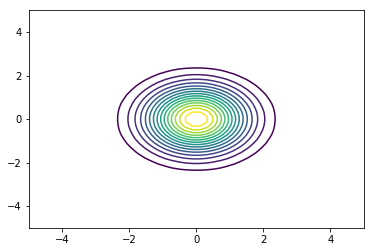

In [209]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

N= 50


# create multivariate distribution
pdf = multivariate_normal([0,0], [[1 , 0],[0,1]]) 
# generate points along axis
x = np.linspace(-5,5,N)
y = np.linspace(-5,5,N)
# get all combinations of the points
x1p,x2p = np.meshgrid(x,y)
pos = np.vstack((x1p.flatten(),x2p.flatten())) 
pos = pos.T
# evaluate pdf at points
Z = pdf.pdf(pos)
Z = Z.reshape(N,N)
# plot contours


#plt.ylabel('w1')
#plt.xlabel('w0')
#plt.title('Prior over w')
pdf_c = plt.contour(x1p,x2p,Z,15)
plt.show()

In [210]:
import random


phi = np.zeros((201,2))

x =  np.zeros((201,1))
y =  np.zeros((201,1))

phi[:,0].fill(1)
       
alpha = 2
beta = 1/0.3



for i in range(201):
    x[i] = -1 + i*0.01
    phi[i,1] = x[i]
    y[i] = -1.3*x[i]+0.5+np.random.normal(0, 0.3)
    



rand = random.sample(range(1, 201), 50)

a = phi
b = rand
c = [ a[i] for i in b]
d = [ y[i] for i in b]

c = np.array(c)
d = np.array(d)


s_n = np.linalg.inv(alpha*np.identity(2) + beta*np.matmul(phi.T,phi))
m_n = np.matmul(s_n, beta*np.matmul(phi.T,y))


s_1 = np.linalg.inv(alpha*np.identity(2) + beta*np.matmul(phi[0:1].T.reshape(2,1),phi[0:1].reshape(1,2)))
m_1 = np.matmul(s_1, beta*np.matmul(phi[0:1].T.reshape(2,1),y[0:1]))


s_2 = np.linalg.inv(alpha*np.identity(2) + beta*np.matmul(phi[0:2].T.reshape(2,2),phi[0:2].reshape(2,2)))
m_2 = np.matmul(s_2, beta*np.matmul(phi[0:2].T.reshape(2,2),y[0:2]))


s_3 = np.linalg.inv(alpha*np.identity(2) + beta*np.matmul(phi[0:3].T.reshape(2,3),phi[0:3].reshape(3,2)))
m_3 = np.matmul(s_3, beta*np.matmul(phi[0:3].T.reshape(2,3),y[0:3]))


s_50 = np.linalg.inv(alpha*np.identity(2) + beta*np.matmul(c.T.reshape(2,50),c.reshape(50,2)))
m_50 = np.matmul(s_50, beta*np.matmul(c.T.reshape(2,50),d))


[-1.]
[ 1.52710468]


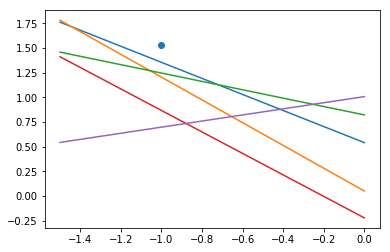

In [221]:
#Sampled after 1 data point
f11 = np.random.multivariate_normal(m_1.reshape(2,),s_1)
f12 = np.random.multivariate_normal(m_1.reshape(2,),s_1)
f13 = np.random.multivariate_normal(m_1.reshape(2,),s_1)
f14 = np.random.multivariate_normal(m_1.reshape(2,),s_1)
f15 = np.random.multivariate_normal(m_1.reshape(2,),s_1)

w = np.linspace(-1.5,0,100)

#plt.title('Samples with 1 data points')

plt.scatter(x[0:1],y[0:1])
plt.plot(w,f11[1]*w+f11[0])
plt.plot(w,f12[1]*w+f12[0])
plt.plot(w,f13[1]*w+f13[0])
plt.plot(w,f14[1]*w+f14[0])
plt.plot(w,f15[1]*w+f15[0])


print(x[0])
print(y[0])
plt.show()


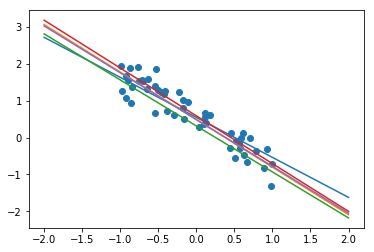

In [225]:
#Sampled after 50 data point
f501 = np.random.multivariate_normal(m_50.reshape(2,),s_50)
f502 = np.random.multivariate_normal(m_50.reshape(2,),s_50)
f503 = np.random.multivariate_normal(m_50.reshape(2,),s_50)
f504 = np.random.multivariate_normal(m_50.reshape(2,),s_50)
f505 = np.random.multivariate_normal(m_50.reshape(2,),s_50)

q = np.linspace(-2,2,100)



#plt.ylabel('y')
#plt.xlabel('x')
#plt.title('Samples with 50 data points')

plt.scatter(c[:,1],d)
plt.plot(q,f501[1]*q+f501[0])
plt.plot(q,f502[1]*q+f502[0])
plt.plot(q,f503[1]*q+f503[0])
plt.plot(q,f504[1]*q+f504[0])
plt.plot(q,f505[1]*q+f505[0])
plt.show()


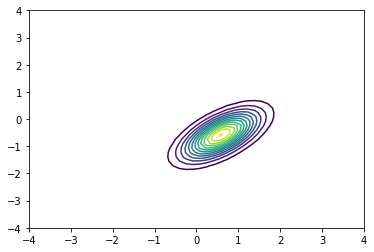

In [223]:
# create multivariate distribution
pdf = multivariate_normal(m_1.reshape(2,), s_1) 
# generate points along axis
x1 = np.linspace(-4,4,N)
y1 = np.linspace(-4,4,N)
# get all combinations of the points
x1p,x2p = np.meshgrid(x1,y1)
pos = np.vstack((x1p.flatten(),x2p.flatten())) 
pos = pos.T
# evaluate pdf at points
Z = pdf.pdf(pos)
Z = Z.reshape(N,N)
# plot contours
#plt.ylabel('w1')
#plt.xlabel('w0')
#plt.title('Posterior over 1 data point')
pdf_c = plt.contour(x1p,x2p,Z,15)
plt.show()

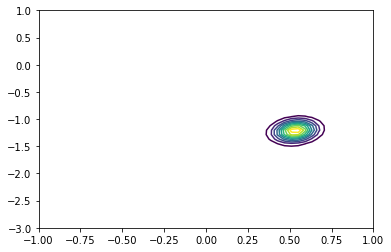

In [224]:
# create multivariate distribution
pdf = multivariate_normal(m_50.reshape(2,), s_50) 
# generate points along axis
x1 = np.linspace(-1,1,N)
y1 = np.linspace(-3,1,N)
# get all combinations of the points
x1p,x2p = np.meshgrid(x1,y1)
pos = np.vstack((x1p.flatten(),x2p.flatten())) 
pos = pos.T
# evaluate pdf at points
Z = pdf.pdf(pos)
Z = Z.reshape(N,N)
# plot contours
#plt.ylabel('w1')
#plt.xlabel('w0')
#plt.title('Posterior over 50 data points')
pdf_c = plt.contour(x1p,x2p,Z,15)
plt.show()

Question 13

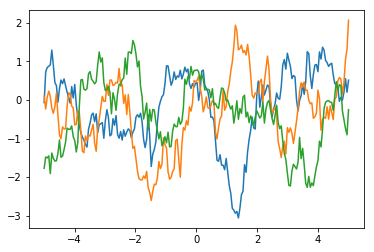

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


#Create Data
#x = np.linspace(-5,5,200).reshape(-1,1)
#mu = np.zeros(x.shape)

#fig, ax = plt.subplots(3, sharex=True, sharey=True, figsize=((5, 5)))
#c = 0
#for i in [0,3,9]:
 #   l = 0.001 + i
 #   K = np.exp(-cdist(x,x)/l**2)
 #   f = np.random.multivariate_normal(mu.flatten(),K,5)
 #   ax[c].plot(x,f.T)
    #plt.ylabel('y')
    #plt.xlabel('x')
    #plt.title('Prior with lengthscale = %s' % l)
    #plt.show()
  #  ax[c].text(-0.8, 3.6, 'ℓ =' + str(l), fontsize=12)
  #  c = c + 1
#fig.subplots_adjust(hspace=0.5)
#plt.show()
#Figure out how to do the fancy subplot stuff

x = np.linspace(-5,5,200).reshape(-1,1)
mu = np.zeros(x.shape)
lengthscale = 1
K = np.exp(-cdist(x,x)/lengthscale**2)
samples_from_prior = np.random.multivariate_normal(mu.flatten(),K,3)
plt.plot(x, samples_from_prior.T)
plt.show()
    


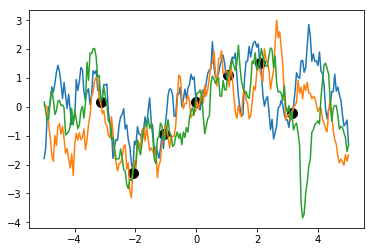

In [238]:
import math
import numpy as np
Xtest = np.linspace(-math.pi, math.pi, 7).reshape(-1,1)
Ytest = np.linspace(-math.pi, math.pi, 7).reshape(-1,1)
for i in range(7):
    Ytest[i] = np.sin(Xtest[i])+np.random.normal(0, 0.5)

lengthscale = 0.7
#defining a squared exponential kernel
def kernel(x,y,lengthscale):
    return np.exp(-cdist(x,y)/(lengthscale**2))


K = kernel(Xtest, Xtest, lengthscale)
KStar = kernel(Xtest, x, lengthscale)
KStarStar = kernel(x, x, lengthscale)

mean = np.matmul(np.matmul(KStar.T, np.linalg.inv(K)),Ytest)
covariance = KStarStar - np.matmul(np.matmul(KStar.T,np.linalg.inv(K)), KStar)

FPosterior = np.random.multivariate_normal(mean.flatten(), covariance, 3)
plt.plot(x, FPosterior.T)
plt.scatter(Xtest, Ytest, c = 'black', s = 100)
#plt.title('3 samples from the posterior')

#Defining a periodic kernel
#def periodic_kernel(x, y, lengthscale, period):
#    return np.exp((-2*math.sin(math.pi*abs((x-y).T.dot(x-y)/period))/lengthscale**2))

#FPosterior = np.random.multivariate_normal(mean.flatten(), covariance, 3)
#plt.plot(x, FPosterior.T)
#plt.show()

#KP = periodic_kernel(Xtest, Xtest, 2, 2*math.pi)
#KPStar = periodic_kernel(Xtest, x, 2, 2*math.pi)
#KPStarStar = periodic_kernel(x, x, 2, 2*math.pi)

#meanP = np.matmul(np.matmul(KStar.T, np.linalg.inv(K)),Ytest)
#covarianceP = KStarStar - np.matmul(np.matmul(KStar.T,np.linalg.inv(K)), KStar)

#FPPosterior = np.random.multivariate_normal(mean.flatten(), covariance, 3)
#plt.plot(x, FPPosterior.T)
plt.show()



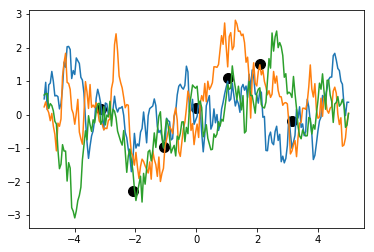

In [239]:
#Sampling from the posterior with with error
const = .5
KError = K + const*np.identity(K.shape[0])
meanError = np.matmul(np.matmul(KStar.T, np.linalg.inv(KError)),Ytest)
covarianceError = KStarStar - np.matmul(np.matmul(KStar.T,np.linalg.inv(KError)), KStar)

FPosteriorError = np.random.multivariate_normal(meanError.flatten(), covarianceError, 3)
plt.plot(x, FPosteriorError.T)
plt.scatter(Xtest, Ytest, c = 'black', s = 100)
#plt.title('3 samples from the posterior with error')


plt.show()

(200, 1)
(200, 200)


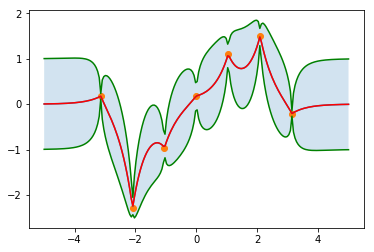

In [240]:
print(mean.shape)
print(covariance.shape)
plt.plot(x,mean)
n = np.zeros(mu.shape)
m = np.zeros(mu.shape)
for i in range(200):
    n[i] = mean[i] + 1*np.sqrt(covariance[i,i])
    m[i] = mean[i] - 1*np.sqrt(covariance[i,i])
plt.plot(x, m,'green')
plt.plot(x, n,'green')
plt.gca().fill_between(x.flatten(),n.flatten(),m.flatten(), alpha = 0.2)
plt.plot(x, mean, 'r')
#plt.title('Predictive mean with predictive variance σ=1')
plt.scatter(Xtest, Ytest)
plt.show()

Value of objective at x: 4513.2642768355745
Value of gradient at x: [  422.78912691   -86.21150387  -531.71598948 -1048.81865075   -48.96081873
  -681.22743663   187.1043962   -117.2048885    195.13789158   271.0523124
  -580.81904688   794.85289972  -158.54155444   385.45750818   406.67706791
  -506.40542196   222.41983572   412.991485     633.13275424  -134.65001582]
         Current function value: 21.551169
         Iterations: 42
         Function evaluations: 111
         Gradient evaluations: 99


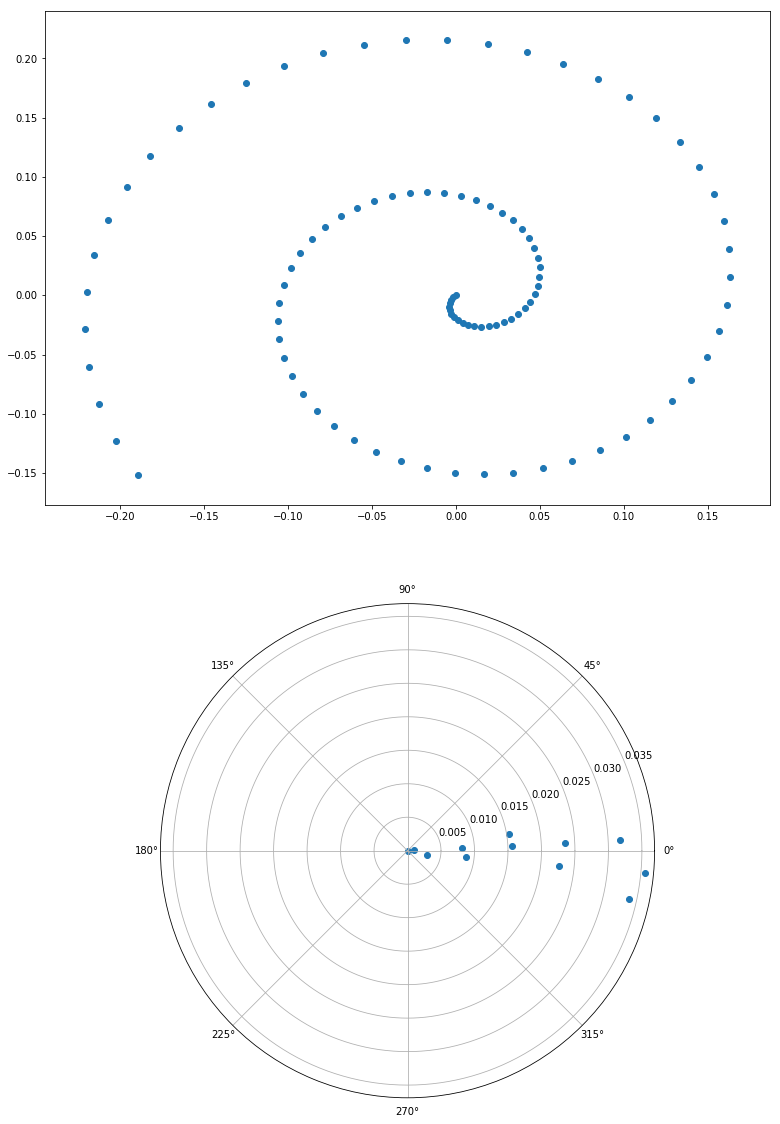

In [241]:
import scipy.optimize as opt

xd = np.linspace(0, 4*pi, 100)

def fnonlin(x):
    #f non linear function
    val = [x*sin(x), x*cos(x)]
    return val



fnl = np.zeros((100,2))
A = np.zeros((10,2))

for i in range(100):

    fnl[i,0] = xd[i]*np.sin(xd[i])
    fnl[i,1] = xd[i]*np.cos(xd[i])
    
fnl = fnl.T
    

A = np.random.normal(0,1,(10,2))

B = np.random.normal(0,1,(10,2))

Y = np.matmul(A, fnl)
        
def f(x, *args):
    # return the value of the objective at x
    
    x = x.reshape((10,2))
    C = np.matmul(x, x.T)+ np.eye(10)
    
    val = math.log(np.linalg.det(C)) + np.matrix.trace(np.matmul(Y.T, np.matmul(inv(C),Y)))    
    return val

print("Value of objective at x: {}".format(f(A))) 




def dfx(x,*args):
    # return the gradient of the objective at x
    
    x = x.reshape((10,2))
    C = np.matmul(x, x.T)+ np.eye(10)
   
    val = np.zeros((10,2))
    
    for i in range(10):
        for j in range(2):
            
            J_ij = np.zeros((2,10))
            J_ij[j,i] = 1
            
            J_ji = np.zeros((10,2))
            J_ji[i,j] = 1
 
                        
            delWWt = np.matmul(x,J_ij) + np.matmul(J_ji,x.T)
    
            P = np.matmul(inv(C), delWWt)
        
            YYt = np.matmul(Y, Y.T)
            
            CdelC = np.matmul(inv(C), np.matmul(delWWt, inv(C)))
        
            val[i,j] = np.matrix.trace(P) + np.matrix.trace(np.matmul(YYt,-CdelC))
    
    
    return val.flatten()


    
    
    
print("Value of gradient at x: {}".format(dfx(A)))    
    
    
x_star = opt.fmin_cg(f,B.flatten(),fprime=dfx)



xy = np.matmul(np.linalg.pinv(x_star.reshape((10,2))),Y)


fig = plt.figure(figsize=(13,20))

ax1 = plt.subplot(211)
ax1 = plt.scatter(xy[0], xy[1])




ax2 = plt.subplot(212, projection='polar')
ax2.scatter(xy[0],xy[1])


plt.show()

In [113]:
#defining a squared exponential kernel
lengthscale1 = 1
t1 = [[1.,0.],[2.,5.], [2., 3.]]
t2 = [[7.,19.], [8.,-4.]]

def kernel1(x,y,lengthscale1):
    return np.exp(-cdist(x,y)/(lengthscale1**2))
x_1 = kernel1(t1,t2,lengthscale1)
#x_2 = kernel1(2,5,3)
#x_3 = kernel1(2,5,8)
print(x_1)
#print(x_3)
#print(x_3)

[[  2.22199845e-09   3.15214327e-04]
 [  3.49742472e-07   2.00625869e-05]
 [  5.24684073e-08   9.90838143e-05]]
